In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import tensorflow as tf
import keras

from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

In [2]:
data = pd.read_csv('data.csv', index_col=0)
data.head()

,age,sex,pain,bpRest,chol,sugar,hrMax,exAng,STdep,slopeST,vessels,thal,target,age_group,hrMax_bins,hrMax_high,STdep_bins
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1,60's,140-159,0,2
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1,30's,180-202,1,4
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,40's,160-179,0,1
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1,50's,160-179,1,1
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1,50's,160-179,0,1


In [37]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['target', 'age_group', 'hrMax_bins'], 1), data['target'], test_size = 0.2, random_state=10)

In [38]:
model = RandomForestClassifier(max_depth = 5)
model.fit(X_train, y_train)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'No Disease'
y_train_str[y_train_str == '1'] = 'Disease'
y_train_str = y_train_str.values

In [41]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [42]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [47]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[20,  8],
       [ 3, 29]], dtype=int64)

In [49]:
total = sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0] / (confusion_matrix[0,0]+confusion_matrix[1,0])
print("Sensitivity: ", sensitivity)

specificity = confusion_matrix[1,1] / (confusion_matrix[1,1]+confusion_matrix[0,1])
print("Specificity: ", specificity)

Sensitivity:  0.8695652173913043
Specificity:  0.7837837837837838


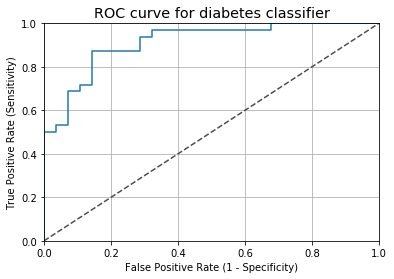

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [55]:
auc(fpr, tpr)

0.9129464285714286

In [60]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

NameError: name 'shap' is not defined